In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch 

# https://zhuanlan.zhihu.com/p/376190734

In [109]:
path = '../data/2/red_average.csv'
# path = '../data/2/white_sum.csv'
file = pd.read_csv(path,encoding='utf-8')
file.head()


,酒样品,澄清度2,色调2,香气纯正度2,香气浓度2,香气质量2,口感纯正度2,口感浓度2,口感持久性2,口感质量2,平衡/整体评价2,总和2
0,1,3.1,7.6,3.6,5.5,10.8,3.8,5.7,6,13.6,8.4,68.1
1,2,3.0,6.0,5.0,6.0,10.0,4.0,6.0,6,16.0,9.0,71.0
2,3,3.0,6.0,5.0,7.0,14.0,4.0,6.0,6,16.0,9.0,76.0
3,4,3.0,6.0,5.0,6.0,12.0,4.0,4.0,5,16.0,9.0,70.0
4,5,3.0,6.0,4.0,4.0,12.0,4.0,4.0,6,16.0,9.0,68.0


In [110]:
new_file = file.iloc[:,1:]
new_file.head()
x= new_file.values

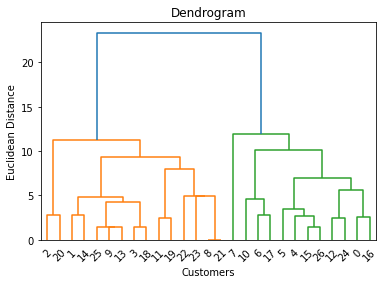

In [111]:
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward')) 
plt.title('Dendrogram') 
plt.xlabel('Customers') 
plt.ylabel('Euclidean Distance') 
plt.savefig('./img/level_analysis.png')
plt.show()

In [112]:
# 该树状图显示了基于欧氏距离的行数据点的层次聚类。它还能告诉树状图中不同颜色簇的合适数量。但是集群的最优选择可以基于树状图中的水平线，即集群数量为5。

from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=8,
                             affinity="euclidean",
                             linkage='ward')

# hc_pred = hc.fit_predict(x)

# https://www.jianshu.com/p/6a7b3641ca59
增量PCA

In [113]:
from sklearn.datasets import load_digits
from sklearn.decomposition import IncrementalPCA
from scipy import sparse
# X, _ = load_digits(return_X_y=True)
# print(X.shape)
transformer = IncrementalPCA(n_components=2, batch_size=200)
# either partially fit on smaller batches of data
transformer.partial_fit(x)
# or let the fit function itself divide the data into batches
X_sparse = sparse.csr_matrix(x)
hc_pce = transformer.fit_transform(X_sparse)
# hc_pred.shape
hc_pred = hc.fit_predict(hc_pce)

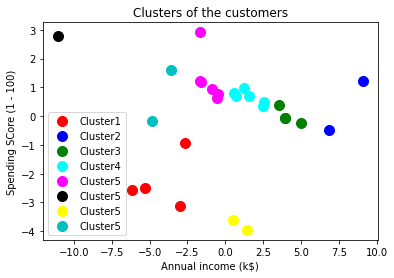

In [114]:
plt.scatter(hc_pce[hc_pred == 0, 0],
            hc_pce[hc_pred == 0, 1],
            s=100,
            c='red',
            label='Cluster1')
plt.scatter(hc_pce[hc_pred == 1, 0],
            hc_pce[hc_pred == 1, 1],
            s=100,
            c='blue',
            label='Cluster2')
plt.scatter(hc_pce[hc_pred == 2, 0],
            hc_pce[hc_pred == 2, 1],
            s=100,
            c='green',
            label='Cluster3')
plt.scatter(hc_pce[hc_pred == 3, 0],
            hc_pce[hc_pred == 3, 1],
            s=100,
            c='cyan',
            label='Cluster4')
plt.scatter(hc_pce[hc_pred == 4, 0],
            hc_pce[hc_pred == 4, 1],
            s=100,
            c='magenta',
            label='Cluster5')
plt.scatter(hc_pce[hc_pred == 5, 0],
            hc_pce[hc_pred == 5, 1],
            s=100,
            c='black',
            label='Cluster5')

plt.scatter(hc_pce[hc_pred == 6, 0],
            hc_pce[hc_pred == 6, 1],
            s=100,
            c='yellow',
            label='Cluster5')
plt.scatter(hc_pce[hc_pred == 7, 0],
            hc_pce[hc_pred == 7, 1],
            s=100,
            c='c',
            label='Cluster5')

plt.title('Clusters of the customers')
plt.xlabel('Annual income (k$)')
plt.ylabel('Spending SCore (1 - 100)')
plt.legend()
plt.savefig('./img/level_analysis_6.png')
plt.show()